<a href="https://colab.research.google.com/github/gestured/Draw_Board/blob/main/DrawBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , confusion_matrix , roc_curve , roc_auc_score
from sklearn.model_selection import train_test_split , GridSearchCV

In [ ]:
apple = np.load('/content/drive/MyDrive/Data/apple.npy')
banana = np.load('/content/drive/MyDrive/Data/banana.npy')
bird = np.load('/content/drive/MyDrive/Data/bird.npy')
camel = np.load('/content/drive/MyDrive/Data/camel.npy')
car = np.load('/content/drive/MyDrive/Data/car.npy')
cat = np.load('/content/drive/MyDrive/Data/cat.npy')
elephant = np.load('/content/drive/MyDrive/Data/elephant.npy')
guitar = np.load('/content/drive/MyDrive/Data/guitar.npy')
horse = np.load('/content/drive/MyDrive/Data/horse.npy')
mountain = np.load('/content/drive/MyDrive/Data/mountain.npy')
umbrella = np.load('/content/drive/MyDrive/Data/umbrella.npy')

In [ ]:
data_apple = np.c_[apple , np.zeros(len(apple))]
data_banana = np.c_[banana , np.ones(len(banana))]
data_bird = np.c_[bird , 2*np.ones(len(bird))]
data_camel = np.c_[camel , 3*np.ones(len(camel))]
data_car = np.c_[car , 4*np.ones(len(car))]
data_cat = np.c_[cat , 5*np.ones(len(cat))]
data_elephant = np.c_[elephant , 6*np.ones(len(elephant))]
data_guitar = np.c_[guitar , 7*np.ones(len(guitar))]
data_horse = np.c_[horse , 8*np.ones(len(horse))]
data_mountain = np.c_[mountain , 9*np.ones(len(mountain))]
data_umbrella = np.c_[umbrella , 10*np.ones(len(umbrella))]

In [ ]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

In [ ]:
print(data_apple.shape)

(144722, 785)


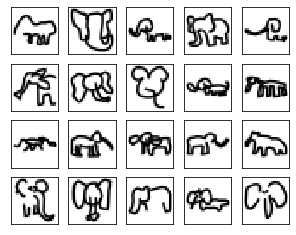

In [ ]:
plot_samples(data_elephant)

In [ ]:
X = np.concatenate((data_apple[:8000 , :-1] ,data_banana [ :8000 , :-1],  data_bird[ :8000, :-1] , data_camel[ :8000, :-1] , data_car[:8000 , :-1] , data_cat[ :8000, :-1] , data_elephant[ :8000, :-1] , data_horse [ :8000 , :-1] , data_guitar [ :8000 , :-1] , data_mountain [ :8000 , :-1] , data_umbrella [ :8000 , :-1] ) , axis = 0).astype('float32')

y = np.concatenate((data_apple[:8000 , -1] ,data_banana [ :8000 , -1],  data_bird[ :8000, -1] , data_camel[ :8000, -1] , data_car[:8000 , -1] , data_cat[ :8000, -1] , data_elephant[ :8000, -1] , data_horse [ :8000 , -1] , data_guitar [ :8000 , -1] , data_mountain [ :8000 , -1] , data_umbrella [ :8000 , -1]) , axis = 0).astype('float32')



In [ ]:
del data_apple
del data_banana
del data_bird
del data_camel
del data_car
del data_cat
del data_elephant
del data_mountain
del data_umbrella
del data_horse
del data_guitar

In [ ]:
y[8000]

1.0

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X/255. , y , test_size = 0.2 , random_state=0)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils  

In [ ]:
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [ ]:
y_test_cnn

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:

# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0] , 28, 28 , 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')

In [ ]:
def cnn_model():

    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=( 28, 28 , 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
%%time
np.random.seed(0)

# Build model
model_cnn = cnn_model()

# Fit Model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=15, batch_size=200)

scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=2)

print('Final CNN accuracy: ', scores[1])

Epoch 1/15
352/352 [==============================] - 9s 6ms/step - loss: 1.3564 - accuracy: 0.5621 - val_loss: 0.5863 - val_accuracy: 0.8196
Epoch 2/15
352/352 [==============================] - 2s 4ms/step - loss: 0.5734 - accuracy: 0.8268 - val_loss: 0.4453 - val_accuracy: 0.8652
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 0.4773 - accuracy: 0.8560 - val_loss: 0.3964 - val_accuracy: 0.8778
Epoch 4/15
352/352 [==============================] - 2s 4ms/step - loss: 0.4171 - accuracy: 0.8730 - val_loss: 0.3637 - val_accuracy: 0.8903
Epoch 5/15
352/352 [==============================] - 2s 4ms/step - loss: 0.3886 - accuracy: 0.8808 - val_loss: 0.3446 - val_accuracy: 0.8950
Epoch 6/15
352/352 [==============================] - 2s 4ms/step - loss: 0.3661 - accuracy: 0.8882 - val_loss: 0.3266 - val_accuracy: 0.8989
Epoch 7/15
352/352 [==============================] - 2s 4ms/step - loss: 0.3430 - accuracy: 0.8930 - val_loss: 0.3180 - val_accuracy: 0.9015
Epoch 

In [ ]:
y_pred = model_cnn.predict_classes(X_test_cnn, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
print(c_matrix)

[[1511    2    9    4    4   10    7   11    3    5    0]
 [   5 1511   27    1    3    7    8   14    3   11    4]
 [  10   12 1353   20   19   44   54   20    5   15   21]
 [   1    0   22 1462    1    8   60    4   55   15    2]
 [   6    2    8    1 1507   14   38    5    2    2    2]
 [  11    1   58    8   21 1392   37   13   52    5    5]
 [   7    5   65   17   37   31 1374    7   58    5   17]
 [   9    4   20    1    8   11    6 1533    0    5    2]
 [   2    2   38   22   15   53   97    8 1367    8    9]
 [   1    7   13    9   11    8   11    3    4 1542    1]
 [   1    1   16    6    5    4   10    2    6    2 1541]]


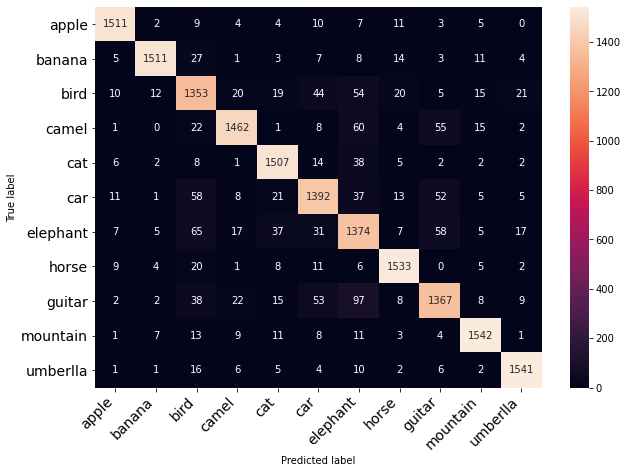

In [ ]:
import seaborn as sns
import pandas as pd
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame( confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['apple','banana','bird','camel','cat','car','elephant','horse','guitar','mountain','umberlla']
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [ ]:

#Misclassification when y_pred and y_test are different.
misclassified = X_test[y_pred != y_test]

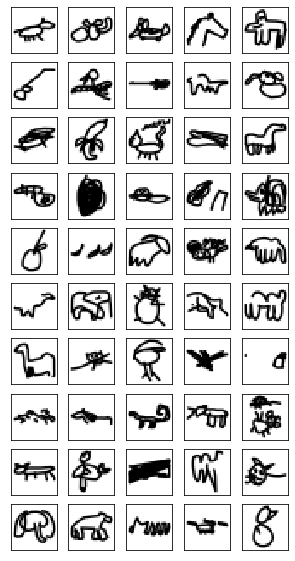

In [ ]:
plot_samples(misclassified, rows=10, cols=5, title='')

**SAVING MODEL**

In [ ]:
from tensorflow.keras.models import load_model
model_cnn.save('/content/drive/MyDrive/Data/model2_cnn.h5')